
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: October 19, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Jordan Pflum (jdp3998)

# Question 1 - MLP Regressor (15 pts) 
In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python; http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html.

The following code will pre-process the data and split the data into training and test sets using train_test_split with random state 30 and test_size = 0.25.

The dataset is loaded from q2_data.csv which contains features of engine and the predictor varialble is "mpg". The features are:
* cylinders 
* displacement
* horsepower
* weight
* acceleration

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
%matplotlib inline


df = pd.read_csv('q2_data.csv') 
df.dropna(inplace=True)
df.columns
y = df['mpg'].values
X = df.drop(['mpg'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(294, 5) (294,) (98, 5) (98,)


In [2]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


We also want to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.

In [3]:
colNames = X_train.columns

scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled = pd.DataFrame(scaler.transform(X_train), columns=colNames)
X_test_Scaled = pd.DataFrame(scaler.transform(X_test), columns=colNames)




   
1) (**5pts**) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set and report the RMSE score for both the trainnig and testing sets (again, use StandardScaler) for the different number of hidden units.

   (a) *hidden_layer_sizes = (5,)* 
   
   (b) *hidden_layer_sizes = (15,)*
   
   (c) *hidden_layer_sizes = (50,)*

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 20,       learning_rate_init = 0.005
    
   Which of the three models ((a)-(c)) performs the best? Briefly analyze and discuss the results, commenting on the number of hidden units.

In [4]:
from sklearn.metrics import mean_squared_error
import math

# Hidden Layer Sizes == 5
regr = MLPRegressor(activation='tanh', solver = 'sgd', learning_rate = 'constant',
                    random_state=42, batch_size=20, learning_rate_init=0.005,
                   hidden_layer_sizes=(5,)).fit(X_train_Scaled, y_train)
prediction_5Layer = regr.predict(X_test_Scaled)
RMSE_5Layer = math.sqrt(mean_squared_error(y_test, prediction_5Layer))
print('5 Hidden-Layer RMSE: ', RMSE_5Layer)

# Hidden Layer Sizes == 15
regr = MLPRegressor(activation='tanh', solver = 'sgd', learning_rate = 'constant',
                    random_state=42, batch_size=20, learning_rate_init=0.005,
                   hidden_layer_sizes=(15,)).fit(X_train_Scaled, y_train)


prediction_15Layer = regr.predict(X_test_Scaled)
RMSE_15Layer = math.sqrt(mean_squared_error(y_test, prediction_15Layer))
print('15 Hidden-Layer RMSE: ', RMSE_15Layer)

# Hidden Layer Sizes == 30
regr = MLPRegressor(activation='tanh', solver = 'sgd', learning_rate = 'constant',
                    random_state=42, batch_size=20, learning_rate_init=0.005,
                   hidden_layer_sizes=(30,)).fit(X_train_Scaled, y_train)


prediction_30Layer = regr.predict(X_test_Scaled)
RMSE_30Layer = math.sqrt(mean_squared_error(y_test, prediction_30Layer))
print('30 Hidden-Layer RMSE: ', RMSE_30Layer)

5 Hidden-Layer RMSE:  4.7984130428905605
15 Hidden-Layer RMSE:  4.5517066936252295
30 Hidden-Layer RMSE:  4.738124120705483


It appears that the 15 Hidden Layer MLP performs the best for prediction, reulting in a root mean squared error loss of 4.55. As the hidden layers increase, I would expect the RMSE to fall. However, the RMSE appears to rise again at 30 hidden layers. This may be due to overfitting.

2) (**5pts**) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot three curves using the following three conditions (a, b, c) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_*:

   (a) *hidden_layer_sizes = (5,)* 
   
   (b) *hidden_layer_sizes = (15,)*
   
   (c) *hidden_layer_sizes = (50,)* 

<function matplotlib.pyplot.show(close=None, block=None)>

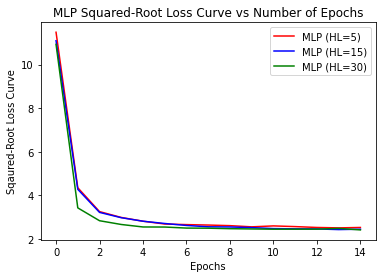

In [5]:
import matplotlib.pyplot as plt

# Hidden Layer Sizes == 5
regr_5Layer = MLPRegressor(activation='tanh', solver = 'sgd', learning_rate = 'constant',
                    random_state=42, batch_size=20, learning_rate_init=0.005,
                   hidden_layer_sizes=(5,)).fit(X_train_Scaled, y_train)

# Hidden Layer Sizes == 15
regr_15Layer = MLPRegressor(activation='tanh', solver = 'sgd', learning_rate = 'constant',
                    random_state=42, batch_size=20, learning_rate_init=0.005,
                   hidden_layer_sizes=(15,)).fit(X_train_Scaled, y_train)

# Hidden Layer Sizes == 30
regr_30Layer = MLPRegressor(activation='tanh', solver = 'sgd', learning_rate = 'constant',
                    random_state=42, batch_size=20, learning_rate_init=0.005,
                   hidden_layer_sizes=(30,)).fit(X_train_Scaled, y_train)
'''
plt.plot(range(len(regr_5Layer.loss_curve_)),np.sqrt(regr_5Layer.loss_curve_), color='red')
plt.plot(range(len(regr_15Layer.loss_curve_)),np.sqrt(regr_15Layer.loss_curve_), color='blue')
plt.plot(range(len(regr_30Layer.loss_curve_)),np.sqrt(regr_30Layer.loss_curve_), color='green')
plt.xlabel('Epochs')
plt.ylabel('Sqaured-Root Loss Curve')
plt.title('MLP Squared-Root Loss Curve vs Number of Epochs')
plt.show
'''
numEpochsToPlot = 15

plt.plot(range(numEpochsToPlot),np.sqrt(regr_5Layer.loss_curve_)[:numEpochsToPlot], color='red', label='MLP (HL=5)')
plt.plot(range(numEpochsToPlot),np.sqrt(regr_15Layer.loss_curve_)[:numEpochsToPlot], color='blue', label='MLP (HL=15)')
plt.plot(range(numEpochsToPlot),np.sqrt(regr_30Layer.loss_curve_)[:numEpochsToPlot], color='green', label='MLP (HL=30)')
plt.xlabel('Epochs')
plt.ylabel('Sqaured-Root Loss Curve')
plt.title('MLP Squared-Root Loss Curve vs Number of Epochs')
plt.legend()
plt.show

3) (**5pts**) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set for different batch size. 

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,learning_rate_init = 0.005 , hidden_layer_sizes = (15,)
   
   Plot three different figures for the three batch size, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_*: 

   (a) *batch_size = 1* 
   
   (b) *batch_size = 20*  
   
   (c) *batch_size = 2000* 
     
   **Compare the three plots obtained comment on the gradient updates. What do you understand about the difference between batch_size = 1, 20 and 2000.**

c:\users\jorda\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

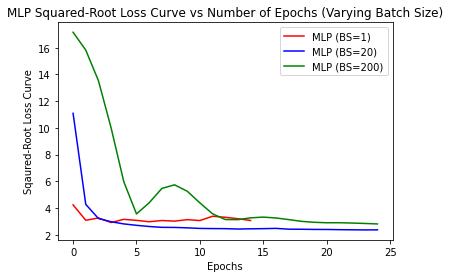

In [6]:
import matplotlib.pyplot as plt

# Batch Size == 1
regr_1BatchSize = MLPRegressor(activation='tanh', solver = 'sgd', learning_rate = 'constant',
                    random_state=42, batch_size=1, learning_rate_init=0.005,
                   hidden_layer_sizes=(15,)).fit(X_train_Scaled, y_train)

# Batch Size == 20
regr_20BatchSize = MLPRegressor(activation='tanh', solver = 'sgd', learning_rate = 'constant',
                    random_state=42, batch_size=20, learning_rate_init=0.005,
                   hidden_layer_sizes=(15,)).fit(X_train_Scaled, y_train)

# Batch Size == 200
regr_200BatchSize = MLPRegressor(activation='tanh', solver = 'sgd', learning_rate = 'constant',
                    random_state=42, batch_size=200, learning_rate_init=0.005,
                   hidden_layer_sizes=(15,)).fit(X_train_Scaled, y_train)


maxNumEpochsToPlot = 15



'''
plt.plot(range(len(regr_1BatchSize.loss_curve_)),np.sqrt(regr_1BatchSize.loss_curve_), color='red')
plt.plot(range(len(regr_20BatchSize.loss_curve_)),np.sqrt(regr_20BatchSize.loss_curve_), color='blue')
plt.plot(range(len(regr_200BatchSize.loss_curve_)),np.sqrt(regr_200BatchSize.loss_curve_), color='green')
plt.xlabel('Epochs')
plt.ylabel('Sqaured-Root Loss Curve')
plt.title('MLP Squared-Root Loss Curve vs Number of Epochs')
plt.show
'''

maxNumEpochsToPlot = 25

if maxNumEpochsToPlot >= len(regr_1BatchSize.loss_curve_):
    plt.plot(range(len(regr_1BatchSize.loss_curve_)),
             np.sqrt(regr_1BatchSize.loss_curve_)[:len(regr_1BatchSize.loss_curve_)], 
             color='red', label='MLP (BS=1)'
            )
else:
    plt.plot(range(maxNumEpochsToPlot),
         np.sqrt(regr_1BatchSize.loss_curve_)[:maxNumEpochsToPlot], 
         color='red', label='MLP (BS=1)'
        )
    
if maxNumEpochsToPlot >= len(regr_20BatchSize.loss_curve_):
    plt.plot(range(len(regr_20BatchSize.loss_curve_)),
             np.sqrt(regr_20BatchSize.loss_curve_)[:len(regr_20BatchSize.loss_curve_)], 
             color='blue', label='MLP (BS=20)'
            )
else:
    plt.plot(range(maxNumEpochsToPlot),
         np.sqrt(regr_20BatchSize.loss_curve_)[:maxNumEpochsToPlot], 
         color='blue', label='MLP (BS=20)'
        )
        
if maxNumEpochsToPlot >= len(regr_200BatchSize.loss_curve_):
    plt.plot(range(len(regr_200BatchSize.loss_curve_)),
             np.sqrt(regr_200BatchSize.loss_curve_)[:len(regr_200BatchSize.loss_curve_)], 
             color='green', label='MLP (BS=200)'
            )
else:
    plt.plot(range(maxNumEpochsToPlot),
         np.sqrt(regr_200BatchSize.loss_curve_)[:maxNumEpochsToPlot], 
         color='green', label='MLP (BS=200)'
        )
        
plt.xlabel('Epochs')
plt.ylabel('Sqaured-Root Loss Curve')
plt.title('MLP Squared-Root Loss Curve vs Number of Epochs (Varying Batch Size)')
plt.legend()
plt.show

When Batch Size is very large, MLP will run faster but will occasionally overshoot its target and take a step in the wrong direction. This is seen ver clearly in the MLP with batch size 200, where it rapidly decreases its loss but then takes a wrong step and ends up raising its loss. However, although it makes an occasional mistake it still converges to the same loss as the MLPs with smaller batch sizes meaning that MLP batch size does not play a major role in loss if a sufficient number of Epochs are allowed to run.

# Question 2: Tensor Playground (15 points)
Visit https://playground.tensorflow.org for this problem

From the far right, select "Classification" as the problem type, and select the data set on the top right (alternate colored squares).

Use these settings as the DEFAULT settings for all subquestions: test/training ratio = 50%, Noise = 0, Batch Size = 30, learning rate = 0.03, activation = tanh, one hidden layer with 2 neurons, input as $X_1$, $X_2$ and no Regularization.

1) Use the DEFAULT setting and run two experiments - one using Tanh as the activation function and one using the linear activation function. Report the train, test losses for both these experiments at the end of 1000 epochs. What qualitative difference do you observe in the decision boundaries obtained? Why? (**4 pts**)

We will now study the effect of certain variations in the network structure or training, keeping all other aspects the same as in the default configuration specified above, and with tanh as the activation for hidden units.

2) Effect of number of hidden units: Go back to DEFAULT settings and report the train, test losses at the end of 1000 epochs for 4 and 8 neurons in the hidden layer (2 pairs of results). What do you observe regarding the decision boundary as the number of neurons increases? Why? (**4 pts**)

3) Effect of learning rate and number of epochs: Go back to DEFAULT settings and set the activation to be Relu and have four neurons in the hidden layer. Report the train, test losses at the end of 100 epochs and 1000 epochs for learning rates of 10, 0.1, 0.01 and 0.001 (8 pairs of results). What do you observe in the loss curves? Explain. (**4 pts**)

4) Go back to DEFAULT settings. Play around with any of the other hyperparameters, network architectures and input features (such as $\sin(X_1), X_1^2$ etc.) and report the best train/test loss you could get (test loss should be at most 0.06). Attach the screenshot from Tensor playground for the same (show your full network, output and parameters). Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc. (**3 pts**)

1) Use the DEFAULT setting and run two experiments - one using Tanh as the activation function and one using the linear activation function. Report the train, test losses for both these experiments at the end of 1000 epochs. What qualitative difference do you observe in the decision boundaries obtained? Why? (**4 pts**)

Using Tanh as the activation function we found that following 1000 Epochs, the model resulted in a training loss of 0.175 and a test loss of 0.193. This compares to the training loss of 0.498 and a test loss of 0.506 when using the linear activation function for our model. The linear MLP is not able to classify many points accuatly (~half). This is probaly because the current model allows for no interaction effects between $X_{1}$ and $X_{2}$ and therefore the linear model cannot distinguish between the quadrants. The tanh activation on the other hand is able to divide points into more sections and is therefore able to better classify points.

We will now study the effect of certain variations in the network structure or training, keeping all other aspects the same as in the default configuration specified above, and with tanh as the activation for hidden units.

2) Effect of number of hidden units: Go back to DEFAULT settings and report the train, test losses at the end of 1000 epochs for 4 and 8 neurons in the hidden layer (2 pairs of results). What do you observe regarding the decision boundary as the number of neurons increases? Why? (**4 pts**)

Using Tanh as the activation function and 4 neurons we found that following 1000 Epochs, the model resulted in a training loss of 0.063 and a test loss of 0.077. This compares to the training loss of 0.007 and a test loss of 0.015 when increasing the number of neurons to 8 for our model. Increaing the number of neurons definetly allows the boundaries to become more defined and accurate for classifying points.

3) Effect of learning rate and number of epochs: Go back to DEFAULT settings and set the activation to be Relu and have four neurons in the hidden layer. Report the train, test losses at the end of 100 epochs and 1000 epochs for learning rates of 10, 0.1, 0.01 and 0.001 (8 pairs of results). What do you observe in the loss curves? Explain. (**4 pts**)

Result 1
- Learning Rate: 10
- Number of Epochs: 100
- Training Error: 0.480
- Testing Error: 0.488

Result 2
- Learning Rate: 10
- Number of Epochs: 1000
- Training Error: 0.480
- Testing Error: 0.488

Result 3
- Learning Rate: 0.1
- Number of Epochs: 100
- Training Error: 0.263
- Testing Error: 0.253

Result 4
- Learning Rate: 0.1
- Number of Epochs: 1000
- Training Error: 0.255
- Testing Error: 0.247

Result 5
- Learning Rate: 0.01
- Number of Epochs: 100
- Training Error: 0.334
- Testing Error: 0.316

Result 6
- Learning Rate: 0.01
- Number of Epochs: 1000
- Training Error: 0.264
- Testing Error: 0.253

Result 7
- Learning Rate: 0.001
- Number of Epochs: 100
- Training Error: 0.411
- Testing Error: 0.391

Result 8
- Learning Rate: 0.001
- Number of Epochs: 1000
- Training Error: 0.166
- Testing Error: 0.137

For large learning rates, the number of epochs plays little row in the training/testing error as the MLP converges quickly. As the learning rate decreases, an increasing number of epochs is needed for the model to converge. As the learning rate decreases as well we see more and more accurate models since the MLP can take smaller steps!


4) Go back to DEFAULT settings. Play around with any of the other hyperparameters, network architectures and input features (such as $\sin(X_1), X_1^2$ etc.) and report the best train/test loss you could get (test loss should be at most 0.06). Attach the screenshot from Tensor playground for the same (show your full network, output and parameters). Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc. (**3 pts**)

Model:
- Activation: Tanh
- Features: $x_{1}x_{2}$
- 1 Hidden Layer, 2 Neurons
- 100 Epochs

Test Loss: 0

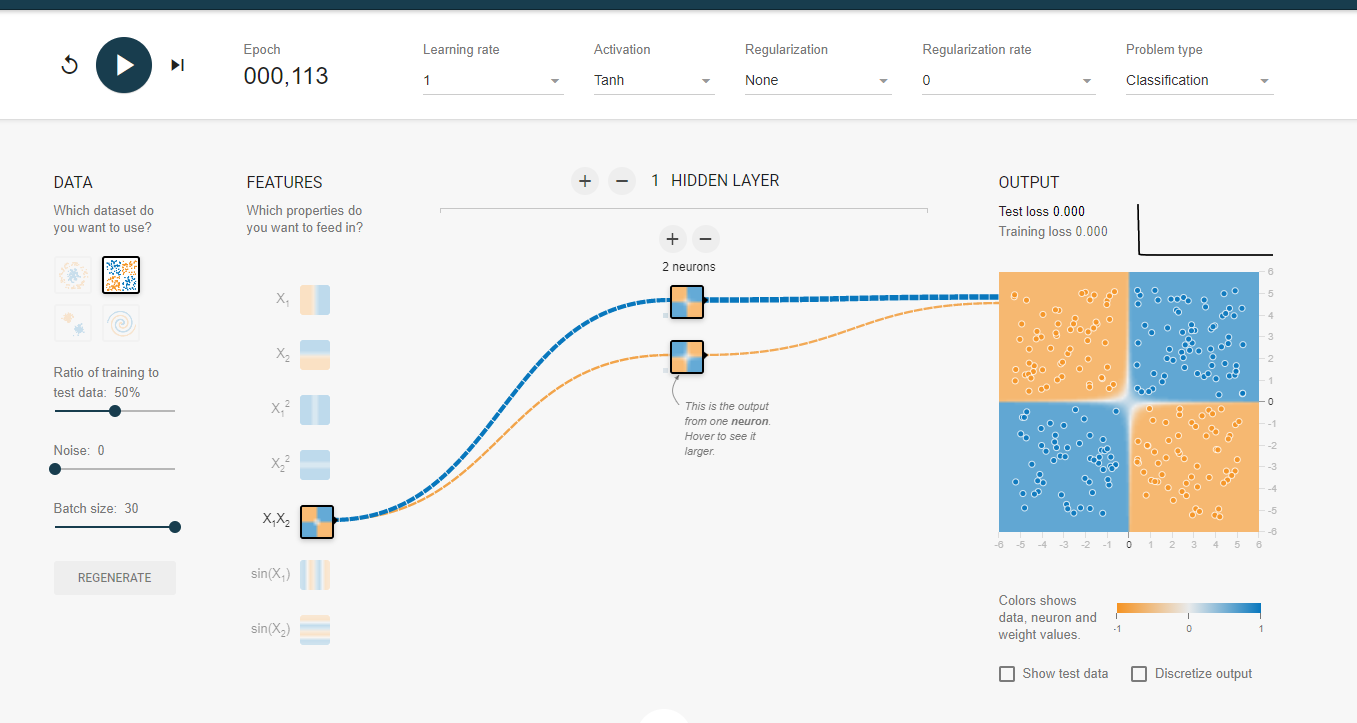

I concluded that the best MLP for the training data would involve features that involved the interaction between $x_{1}$ and $x_{2}$. I therefore chose $x_{1}x_{2}$ as my sole feature. Additionally, I decided to keep the model as simple as possible, including only one hidden layer and 2 neurons. I also set the learning rate to 1 as I expected the MLP to converge quickly.

NOTE: I increased the learning rate to show that the MPR still converges at a fast rate.

# Question 3 - Feature Selection (20 pts)

In this question, we will explore the importance of feature selection, You can use the below code to load the dataset "zoo.csv". This dataset contains a set of features for different animals and the output is class_type 
corresponding to the features. The details of class_type is present in class.csv for your reference.

In [7]:
df = pd.read_csv("zoo.csv")
df.columns
y = df['class_type'].values
X = df.drop(['class_type','animal_name'], axis = 1)

class_df = pd.read_csv("class.csv")

1. Plot the correlation matrix. The resulting correlation plot should be (n_features * n_features) matrix. List the top 5 most positively correlated features with class_type. (**3pts**)

eggs        0.661825
aquatic     0.326639
venomous    0.321476
legs        0.131693
fins        0.099430
Name: class_type, dtype: float64

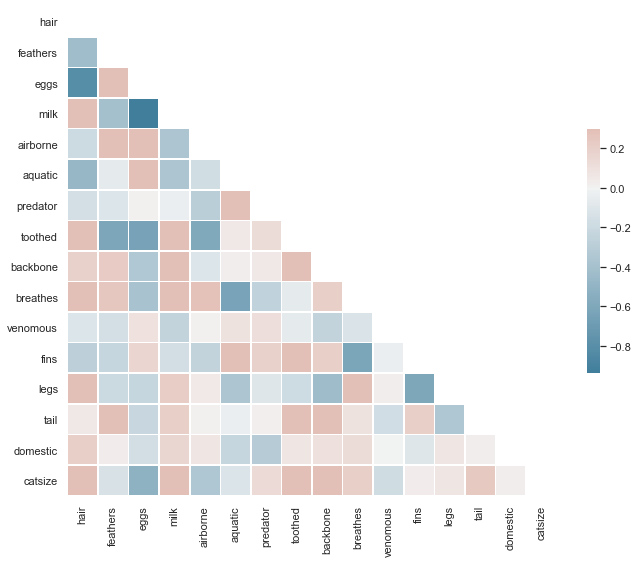

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
'''
# Get Top 5 Correlated Features
corrValues = corr.unstack()
pairs_to_drop = set()
cols = X.columns
for i in range(0, X.shape[1]):
    for j in range(0, i+1):
        pairs_to_drop.add((cols[i], cols[j]))
corrValues.drop(labels=pairs_to_drop).sort_values(ascending=False)[:5]
'''

corrWClassType = df.corr()
top5PositivilyCorrelatedFeatures = corrWClassType['class_type'].drop(labels=['class_type']).sort_values(ascending=False)[:5]
top5PositivilyCorrelatedFeatures

2. List the top 5 most negatively correlated features with class_type. (**3pts**)

In [9]:
corrWClassType = df.corr()
top5NegativlyCorrelatedFeatures = corrWClassType['class_type'].drop(labels=['class_type']).sort_values(ascending=True)[:5]
top5NegativlyCorrelatedFeatures

backbone   -0.828845
milk       -0.723683
tail       -0.631830
hair       -0.562384
catsize    -0.521030
Name: class_type, dtype: float64

3. Use https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE to perform feature selection with estimator = LogisticRegression(max_iter=1000) estimator. List the top 5 features selected from RFE.(**2pts**)



- Create a train_test split of 80:20(train:test) with random state = 50

- We need to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Split into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=50)

# Standardize Data
colNames = X_train.columns

scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled = pd.DataFrame(scaler.transform(X_train), columns=colNames)
X_test_Scaled = pd.DataFrame(scaler.transform(X_test), columns=colNames)

# RFE
estimator = LogisticRegression(max_iter=1000)

selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_train_Scaled, y_train)
feature_rankings = selector.ranking_

topFeatures_RFE = []
for i, feature in enumerate(X_train.columns):
    if feature_rankings[i]==1:
        topFeatures_RFE.append(feature)
topFeatures_RFE

['hair', 'feathers', 'milk', 'backbone', 'fins']

4. Train a MLP Regressor with train data and report the ${R^2}$ score on the test set for each of the following, 


- a) Model trained with top 5 most positvely correlated features from part 1
- b) Model trained with top 5 most negatively correlated features from part 2
- c) Model trained with five features selected by RFE from part 3
- d) Finally train a MLP Regressor on the entire training data with the entire orignal features.Use the default values for MLPRegressor as below(**8pts**)
MLPRegressor(max_iter = 1000,random_state=1)

In [11]:
from sklearn.metrics import r2_score
# Model trained with top 5 most positvely correlated features
model1 = MLPRegressor(max_iter = 1000,random_state=1).fit(X_train_Scaled[list(top5PositivilyCorrelatedFeatures.index.values)],
                                                        y_train
                                                         )

prediction_model1 = model1.predict(X_test_Scaled[list(top5PositivilyCorrelatedFeatures.index.values)])

R2Score_model1 = r2_score(y_test, prediction_model1)
print('Model 1 R2 Score: ', R2Score_model1)

# Model trained with top 5 most negatively correlated features
model2 = MLPRegressor(max_iter = 1000,random_state=1).fit(X_train_Scaled[list(top5NegativlyCorrelatedFeatures.index.values)],
                                                        y_train
                                                         )

prediction_model2 = model2.predict(X_test_Scaled[list(top5NegativlyCorrelatedFeatures.index.values)])

R2Score_model2 = r2_score(y_test, prediction_model2)
print('Model 2 R2 Score: ', R2Score_model2)

# Model trained with five features selected by RFE
model3 = MLPRegressor(max_iter = 1000,random_state=1).fit(X_train_Scaled[topFeatures_RFE],
                                                        y_train
                                                         )

prediction_model3 = model3.predict(X_test_Scaled[topFeatures_RFE])

R2Score_model3 = r2_score(y_test, prediction_model3)
print('Model 3 R2 Score: ', R2Score_model3)

#  MLP Regressor on the entire training data with the entire orignal features
model4 = MLPRegressor(max_iter = 1000,random_state=1).fit(X_train_Scaled,
                                                        y_train
                                                         )

prediction_model4 = model4.predict(X_test_Scaled)

R2Score_model4 = r2_score(y_test, prediction_model4)
print('Model 4 R2 Score: ', R2Score_model4)

Model 1 R2 Score:  0.6895112688851422
Model 2 R2 Score:  0.8346085417665577
Model 3 R2 Score:  0.9524905432342431
Model 4 R2 Score:  0.9690391877029567


5. Explain your results based on your understanding of feature selection and the ${R^2}$ score.  (**4pts**) 

Choosing features based on their correlation with the predictor alone seems insufficient in optimizing models. Perhaps a better solution would have been to ignore the sign of the correlation and just focus on the magnitude. The difference of R2 Score between the MLP trained on features selected from REF and the MLP trained on the entire dataset is marginal. Moreover, since R2 Score will sctrictly increase with the addition of every new feature, regarless of its impact on the model's accuracy, I would conclude that the model trained with REF features is the best. In conclusion, because not much more is added by including all features and the increase in score (R2 Score) is somewhat misleading because it does not penalize the number of features, the best model is Model 3.

# Question 4 (Data Pre-processing - 25pts)
The following dataset contains House Sales data in King County, USA. This dataset contains house sale prices for King County, which includes Seattle. This dataset contains the following columns:

* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: Square footage of the home
* sqft_lot: Square footage of the lot
* floors: Total floors (levels) in house
* waterfront: House which has a view to a waterfront (0/1)
* view: Has been viewed (0-4)
* condition: How good the condition is Overall (1-5)
* grade: Overall grade given to the housing unit, based on King County grading system (1-13)
* sqft_above: Square footage of house apart from basement
* sqft_basement: Square footage of the basement
* yr_built: Built Year
* yr_renovated: Year when house was renovated
* zipcode: Zip code
* price: Selling price of house

Here, price is the dependent variable while all other variables are assumed to be independent variables. Here, 10% cells of most columns in the dataset contain NaN value.

In [12]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(100)

df = pd.read_csv("kc_house_data.csv")
age = df['yr_renovated']
built = df['yr_built']
df.iloc[:, :-1] = df[:-1].mask(np.random.random(df[:-1].shape)<0.1)
df['yr_renovated'] = age
df['yr_built'] = built
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,0,98178.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,0,NaN,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,0,NaN,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,0,98074.0,510000.0


### Question 4.1 (5 points)
Print the number of NaN values in each column. Next, if the value of `yr_renovated` is equal to 0, set it equal to the corresponding value of `yr_built`.

In [13]:
df.isna().sum()

bedrooms         2150
bathrooms        2150
sqft_living      2170
sqft_lot         2091
floors           2152
waterfront       2179
view             2184
condition        2096
grade            2135
sqft_above       2163
sqft_basement    2198
yr_built            0
yr_renovated        0
zipcode          2169
price               0
dtype: int64

In [14]:
df['yr_renovated'] =  df.where(df['yr_renovated'] == '0', df['yr_built'].astype(str), axis=0)

### Question 4.2 (6 points)

Create a copy of `df` named `df_dm` and create a new column in `df_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use [pandas.cut()](https://stackoverflow.com/a/31740881) and modify its paramter list as below:
- `bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]`
- `labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']`
- `include_lowest=True`

Next, perform one-hot encoding using this new column.

In [15]:
df_dm = df.copy()
df_dm['binned_yr_build'] = pd.cut(df_dm['yr_built'],
                                 bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020],
                                 labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'],
                                 include_lowest=True
                                 )
# One Hot Encoding
df_dm = pd.concat([df_dm,pd.get_dummies(df_dm.binned_yr_build, prefix='YearRange_')],axis=1).drop(['binned_yr_build'],axis=1)

## Question 4.3 (4 points)
Create a copy of `df` named `temp_df`. Drop all rows in `temp_df` that contain any null value and run a linear regression model using a train-test split with `test_size=0.3` and `random_state=42`.

In [16]:
temp_df = df.copy()
temp_df = temp_df.dropna(axis=0)

y = temp_df['price'].values
X = temp_df.drop(['price'], axis = 1)

# Split into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

## Question 4.4 (8 points)

Use `df` to create a train/test split with `test_size=0.30` and `random_state=42`. Use the following imputation methods to fill in all NaN values for the obtained training set.
- mean (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- median (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- most_frequent (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- k-Nearest Neighbors (using [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer)) - Run this four times with the value of `n_neighbors` = 2, 5, 10 and 20.

For each method, impute the test set with the same imputer and print the test $R^2$ score obtained using a linear regression model. Which method gives the best result? What can you say from the result of a) SimpleImputer and b) KNNImputer?

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import numpy as np

y = df['price'].values
X = df.drop(['price'], axis = 1)

# Split into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

# Prepcrocessing (Mean)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_train)
SimpleImputer()
imputedX_train = imp_mean.transform(X_train)
imputedX_test = imp_mean.transform(X_test)

# Linear Regression
model1 = LinearRegression().fit(imputedX_train, y_train)

# Score
prediction_model1 = model1.predict(imputedX_test)

R2Score_model1 = r2_score(y_test, prediction_model1)
print('Model 1 R2 Score: ', R2Score_model1)


# Prepcrocessing (Median)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(X_train)
SimpleImputer()
imputedX_train = imp_mean.transform(X_train)
imputedX_test = imp_mean.transform(X_test)

# Linear Regression
model2 = LinearRegression().fit(imputedX_train, y_train)

# Score
prediction_model2 = model2.predict(imputedX_test)

R2Score_model2 = r2_score(y_test, prediction_model2)
print('Model 2 R2 Score: ', R2Score_model2)



# Prepcrocessing (most frequent)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean.fit(X_train)
SimpleImputer()
imputedX_train = imp_mean.transform(X_train)
imputedX_test = imp_mean.transform(X_test)

# Linear Regression
model3 = LinearRegression().fit(imputedX_train, y_train)

# Score
prediction_model3 = model3.predict(imputedX_test)

R2Score_model3 = r2_score(y_test, prediction_model3)
print('Model 3 R2 Score: ', R2Score_model3)



# Prepcrocessing (most KNN (2))
imputer = KNNImputer(missing_values=np.nan, n_neighbors=2)
imputer.fit_transform(X_train)
imputedX_train = imputer.transform(X_train)
imputedX_test = imputer.transform(X_test)

# Linear Regression
model4 = LinearRegression().fit(imputedX_train, y_train)

# Score
prediction_model4 = model4.predict(imputedX_test)

R2Score_model4 = r2_score(y_test, prediction_model4)
print('Model 4 R2 Score: ', R2Score_model4)

# Prepcrocessing (most KNN (5))
imputer = KNNImputer(missing_values=np.nan, n_neighbors=5)
imputer.fit_transform(X_train)
imputedX_train = imputer.transform(X_train)
imputedX_test = imputer.transform(X_test)

# Linear Regression
model5 = LinearRegression().fit(imputedX_train, y_train)

# Score
prediction_model5 = model5.predict(imputedX_test)

R2Score_model5 = r2_score(y_test, prediction_model5)
print('Model 5 R2 Score: ', R2Score_model5)

# Prepcrocessing (most KNN (10))
imputer = KNNImputer(missing_values=np.nan, n_neighbors=10)
imputer.fit_transform(X_train)
imputedX_train = imputer.transform(X_train)
imputedX_test = imputer.transform(X_test)

# Linear Regression
model10 = LinearRegression().fit(imputedX_train, y_train)

# Score
prediction_model10 = model10.predict(imputedX_test)

R2Score_model10 = r2_score(y_test, prediction_model10)
print('Model 6 R2 Score: ', R2Score_model10)


# Prepcrocessing (most KNN (20))
imputer = KNNImputer(missing_values=np.nan, n_neighbors=20)
imputer.fit_transform(X_train)
imputedX_train = imputer.transform(X_train)
imputedX_test = imputer.transform(X_test)

# Linear Regression
model20 = LinearRegression().fit(imputedX_train, y_train)

# Score
prediction_model20 = model20.predict(imputedX_test)

R2Score_model20 = r2_score(y_test, prediction_model20)
print('Model 7 R2 Score: ', R2Score_model20)



Model 1 R2 Score:  0.6287480484791041
Model 2 R2 Score:  0.6231858865624316
Model 3 R2 Score:  0.6182715766293676


The Linear Regression using 'KNN==20' lead to the highest R2 Score, with a score of 0.6368098342449184. While on average, using KNN as an imputer vs simpler methods (mean, meadian, most_frequent), there was not much improvement. On much large datasets, KNN might become impracticle and you might opt to use a simpler, more computationally efficient method.

## Question 4.5 (2 points)
In Questions 4.3 and 4.4, when you dropped all rows containing any null value, you obtained better $R^2$ score than when you imputed the missing values. What can be some possible reasons behind this?

When dropping all rows with any null values, you are also dropping all values in the test set that have null values. Thus, if these entries are the values that are difficult to predict, the model might perform better. When predicting on real data, you do not have the option of dropping null values on the test set (ie when predicting). These are values you need to predict on.

# Question 5: Supplementary Notes (10 points)
Visit the [Supplementary Notes website](https://ideal-ut.github.io/APM-2020/). Read the notes written by your peers from both sections (first 6 topics/lectures only, i.e. up to "gradient descent"). Select the note that you liked the most and write the following:
- Identify the note. (e.g., If you liked the note from Section A for topic 1, write 1A).
- Write one-two paragraphs on why you liked your selection the most and what you learnt from it.
- Also write a short paragraph on how you think this note can be further improved.

10A 

I enjoyed the supplementary note on Data Preprocessing the most because it is an often over looked part of data science (at least in the begining). Most of the publics focus on data science is mentioned is drawn toward advanced modeling techniques, such as advanced machine learning algorithms. While these topics are undoubtedly intersting, they are useless unless proper preprocessing techniques are employed before hand. I ejoyed that the note went into data imputation and different methods to impute data. Before reading the article, I never stopped to consider why the data was missing, and what impact this would have in selecting how to impute the data. However, sourcing the reason for NaNs is fundemental in the approach, as missing values may be grouped together which could lead you to lean more toward a KNN imputation.

I think the note could have elaborated more on employing various imputation techniques. While mentioned, no attempt was made to show how the technique in practice. Additionally, I would have liked the note to touch on KNN imputation, as well as categorical variable imputation.